In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Text(0, 0.5, 'Sigmoid function')

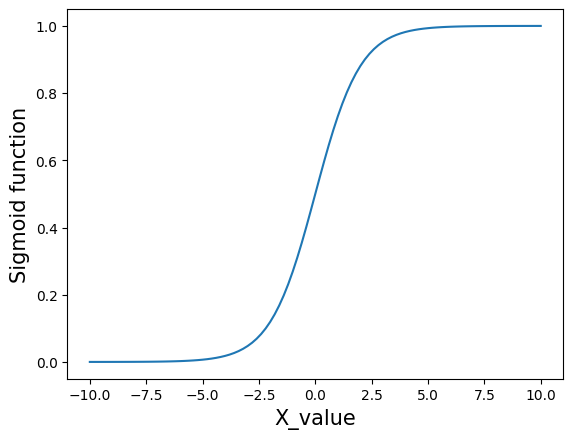

In [ ]:
g = lambda z : 1/(1+np.exp(-z))

x = np.linspace(-10,10,101)
y = g(x)
plt.plot(x,y)
plt.xlabel("X_value", fontsize=15)
plt.ylabel("Sigmoid function", fontsize=15)

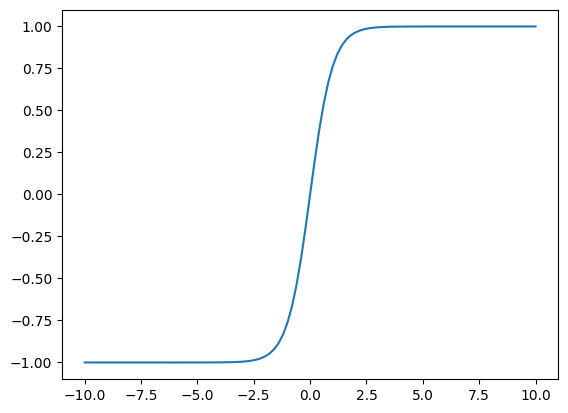

In [ ]:
y1 = np.tanh(x)
plt.plot(x,y1)

In [ ]:
X = np.array([[1,0,0],[1,1,0],[1,0,1],[1,1,1]])
w_and = np.array([[-30,20,20]])

z = np.dot(X,w_and.T)
print(z)
y_pred = g(z)
print(y_pred)

[[-30]
 [-10]
 [-10]
 [ 10]]
[[9.35762297e-14]
 [4.53978687e-05]
 [4.53978687e-05]
 [9.99954602e-01]]


In [ ]:
w_an1 = np.array([[-10,20,20]])
z1 = np.add(X,w_an1)
y_pred = g(z1)
print(y_pred)

[[1.23394576e-04 9.99999998e-01 9.99999998e-01]
 [1.23394576e-04 9.99999999e-01 9.99999998e-01]
 [1.23394576e-04 9.99999998e-01 9.99999999e-01]
 [1.23394576e-04 9.99999999e-01 9.99999999e-01]]


In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')
df = pd.DataFrame(data)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
X = data.iloc[:,[2,3]].values
y = data.iloc[:,[-1]].values
print(X.shape)

(400, 2)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(320, 2) (80, 2)
(320, 1) (80, 1)


In [ ]:
X_max = X_train.max(axis=0, keepdims=True)
X_min = X_train.min(axis=0, keepdims=True)

In [ ]:
X_train_scaled = (X_train - X_min)/(X_max - X_min)
X_test_scaled = (X_test - X_min)/(X_max - X_min)

In [ ]:
print(X_train_scaled.shape, y_train.shape)
X_train_new = np.hstack((np.ones([X_train_scaled.shape[0],1]), X_train_scaled))
X_test_new = np.hstack((np.ones([X_test_scaled.shape[0], 1]), X_test_scaled))
print(X_train_new.shape,y_train.shape)

(320, 2) (320, 1)
(320, 3) (320, 1)


In [ ]:
g = lambda z : 1/(1+np.exp(-z))

def predict(X, w1, w2, w3):
  z1 = np.dot(X,w1)
  a1 = g(z1)

  a1 = np.hstack((np.ones((a1.shape[0],1)),a1))

  z2 = np.dot(a1,w2)
  a2 = g(z2)

  a2 = np.hstack((np.ones((a2.shape[0],1)),a2))
  z3 = np.dot(a2,w3)

  return g(z3)

def loss (X,y,w1,w2,w3):
  y_hat = predict(X,w1,w2,w3)
  l = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -np.mean(l)

def predict_prob(X,w1,w2,w3):
  y_hat = predict(X,w1,w2,w3)
  y_hat[y_hat>=0.5] = 1
  y_hat[y_hat<0.5] = 0 
  return y_hat


In [ ]:
NDIMS = 3
L1 = 32
L2 = 8
epochs = 10000
lr = 0.02


w1 = np.random.randn(NDIMS,L1)
w2 = np.random.randn(L1+1,L2)
w3 = np.random.randn(L2+1,1)

y_pred = predict(X_train_new, w1, w2, w3)
l0 = loss (X_train_new,y_train,w1,w2,w3)

print("Initial loss = ",l0)
for i in range (epochs): 
  dw1 = lr*np.random.randn(NDIMS,L1)
  dw2 = lr*np.random.randn(L1+1,L2)
  dw3 = lr*np.random.randn(L2+1,1)

  l1 = loss(X_train_new, y_train, w1+dw1, w2+dw2, w3+dw3)
  if(l1<l0):
    l0 = l1
    w1 += dw1
    w2 += dw2
    w3 += dw3
print(f"Final loss = {l0}")

Initial loss =  1.4392363860220017
Final loss = 0.2257478468170541


In [ ]:
def accuracy(y_true, y_pred):
  tp = tn = fp = fn = 0 
  for i in range(len(y_true)): 
    if y_true[i] == 1 and y_pred[i] == 1: 
      tp += 1 
    elif y_true[i] == 0 and y_pred[i] == 0: 
      tn += 1 
    elif y_true[i] == 0 and y_pred[i] == 1: 
      fp += 1 
    elif y_true[i] == 1 and y_pred[i] == 0: 
      fn += 1 

  acc = (tp+tn) / (tp+tn+fp+fn)
  pre = (tp) / (tp+fp)
  recall = tp / (tp+fn)
  f1_score = (2*pre*recall) / (recall+pre)

    
  print("Accuracy: ", acc)
  print("Precision: ", pre)
  print("Recall: ", recall)
  print("f1_score: ", f1_score)

In [ ]:
y_pred1 = predict_prob(X_test_new,w1,w2,w3)
accuracy(y_test,y_pred1)


Accuracy:  0.9375
Precision:  0.8709677419354839
Recall:  0.9642857142857143
f1_score:  0.9152542372881356


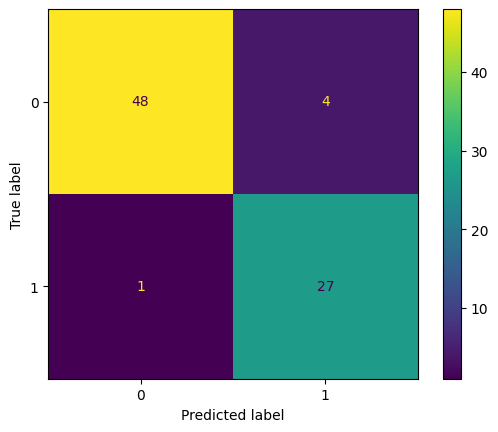

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
class MyNeuralNetwork:
  def __init__(self, lr=0.02,epochs=1000):
    self.lr = lr
    self.epochs = epochs

    g = lambda z : 1/(1+np.exp(-z))

  def predict(self,X):
    z1 = np.dot(X,w1)
    a1 = g(z1)

    a1 = np.hstack((np.ones((a1.shape[0],1)),a1))

    z2 = np.dot(a1,w2)
    a2 = g(z2)

    a2 = np.hstack((np.ones((a2.shape[0],1)),a2))
    z3 = np.dot(a2,w3)

    return g(z3)

  def loss (self,X,y):
    y_hat = self.predict(X)
    l = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
    return -np.mean(l)

  def fit (self,X,y):
    NDIMS = 3
    L1 = 32
    L2 = 8
    epochs = 10000
    lr = 0.02
   

    w1 = np.random.randn(NDIMS,L1)
    w2 = np.random.randn(L1+1,L2)
    w3 = np.random.randn(L2+1,1)

    y_pred = self.predict(X)
    l0 = loss (X,y,w1,w2,w3)

    print("Initial loss = ",l0)
    for i in range (epochs): 
      dw1 = lr*np.random.randn(NDIMS,L1)
      dw2 = lr*np.random.randn(L1+1,L2)
      dw3 = lr*np.random.randn(L2+1,1)

      l1 = loss(X,y,w1+dw1,w2+dw2,w3+dw3)
      if(l1<l0):
        l0 = l1
        w1 += dw1
        w2 += dw2
        w3 += dw3
    print(f"Final loss = {l0}")
    



In [ ]:
model = MyNeuralNetwork()
model.fit(X_train_new, y_train)

Initial loss =  0.8890062036621487
Final loss = 0.22735411382940135


Act3:

In [ ]:
X_train1, X_val, y_train1, y_val = train_test_split (X_train, y_train, test_size = 0.1,random_state=42)
print(X_train1.shape, y_train1.shape)
print(X_val.shape, y_val.shape)

(288, 2) (288, 1)
(32, 2) (32, 1)


In [ ]:
X_max = X_train1.max(axis=0, keepdims=True)
X_min = X_train1.min(axis=0, keepdims=True)

In [ ]:
X_train1_scaled = (X_train1 - X_min)/(X_max - X_min)
X_val_scaled = (X_val - X_min)/(X_max - X_min)

In [ ]:
print(X_train1_scaled.shape, y_train1.shape)
X_train1_new = np.hstack((np.ones([X_train1_scaled.shape[0],1]), X_train1_scaled))
X_train2_new = np.hstack((np.ones([X_train1_new.shape[0],1]), X_train1_new))
X_val_new = np.hstack((np.ones([X_val_scaled.shape[0], 1]), X_val_scaled))
X_val1_new = np.hstack((np.ones([X_val_new.shape[0], 1]), X_val_new))
print(X_train2_new.shape,y_train1.shape)

(288, 2) (288, 1)
(288, 4) (288, 1)


In [ ]:
g = lambda z : 1/(1+np.exp(-z))

def predict(X, w1, w2, w3, w4):
  z1 = np.dot(X,w1)
  a1 = g(z1)
  a1 = np.hstack((np.ones((a1.shape[0],1)),a1))

  z2 = np.dot(a1,w2)
  a2 = g(z2)
  a2 = np.hstack((np.ones((a2.shape[0],1)),a2))
  
  z3 = np.dot(a2,w3)
  a3 = g(z3)
  a3 = np.hstack((np.ones((a3.shape[0],1)),a3))

  z4 = np.dot(a3,w4)
 
  return g(z4)

def loss (X,y,w1,w2,w3,w4):
  y_hat = predict(X,w1,w2,w3,w4)
  l = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -np.mean(l)

def predict_prob(X,w1,w2,w3,w4):
  y_hat = predict(X,w1,w2,w3,w4)
  y_hat[y_hat>=0.5] = 1
  y_hat[y_hat<0.5] = 0 
  return y_hat


In [ ]:
NDIMS = 4
L1 = 32
L2 = 32
L3 = 8
epochs = 10000
lr = 0.01


w1 = np.random.randn(NDIMS,L1)
w2 = np.random.randn(L1+1,L2)
w3 = np.random.randn(L2+1,L3)
w4 = np.random.randn(L3+1,1)



y_pred = predict(X_train2_new, w1, w2, w3,w4)
l0 = loss (X_train2_new,y_train1,w1,w2,w3,w4)

print("Initial loss = ",l0)
for i in range (epochs): 
  dw1 = lr*np.random.randn(NDIMS,L1)
  dw2 = lr*np.random.randn(L1+1,L2)
  dw3 = lr*np.random.randn(L2+1,L3)
  dw4 = lr*np.random.randn(L3+1,1)

  l1 = loss(X_train2_new, y_train1, w1+dw1, w2+dw2, w3+dw3, w4+dw4)
  if(l1<l0):
    l0 = l1
    w1 += dw1
    w2 += dw2
    w3 += dw3
    w4 += dw4
print(f"Final loss = {l0}")

Initial loss =  0.98463243867051
Final loss = 0.21307706008798621


In [ ]:
def accuracy(y_true, y_pred):
  tp = tn = fp = fn = 0 
  for i in range(len(y_true)): 
    if y_true[i] == 1 and y_pred[i] == 1: 
      tp += 1 
    elif y_true[i] == 0 and y_pred[i] == 0: 
      tn += 1 
    elif y_true[i] == 0 and y_pred[i] == 1: 
      fp += 1 
    elif y_true[i] == 1 and y_pred[i] == 0: 
      fn += 1 

  acc = (tp+tn) / (tp+tn+fp+fn)
  pre = (tp) / (tp+fp)
  recall = tp / (tp+fn)
  f1_score = (2*pre*recall) / (recall+pre)

    
  print("Accuracy: ", acc)
  print("Precision: ", pre)
  print("Recall: ", recall)
  print("f1_score: ", f1_score)

In [ ]:
y_pred2 = predict_prob(X_val1_new,w1,w2,w3,w4)
# y_hat = predict(X_val1_new,w1,w2,w3,w4)
# print(y_pred2)
accuracy(y_val,y_pred2)

Accuracy:  0.90625
Precision:  0.8181818181818182
Recall:  0.9
f1_score:  0.8571428571428572


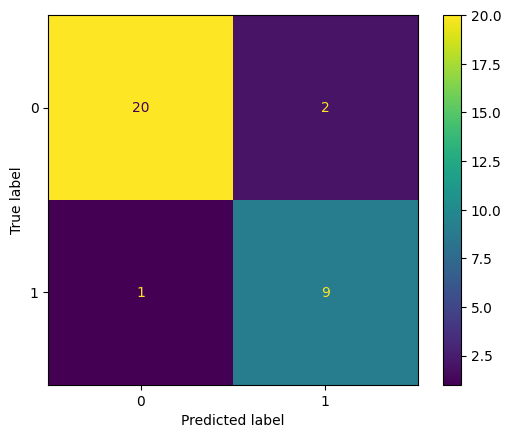

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()